# Proyecto 2 entrega #3

## Implementación del modelo de Naive Bayes

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Cargar los datos
data = pd.read_csv('train.csv')

# Convertir la variable objetivo en categorías
num_bins = 3  # Número de categorías
labels = ['bajo', 'medio', 'alto']
data['SalePrice_cat'] = pd.qcut(data['SalePrice'], q=num_bins, labels=labels)

# Seleccionar características y variable objetivo
X = data.drop(['SalePrice', 'SalePrice_cat'], axis=1)
y = data['SalePrice_cat']

# Convertir variables categóricas en numéricas
X = pd.get_dummies(X, drop_first=True)

# Manejo de valores faltantes
X.fillna(X.mean(), inplace=True)  # Rellenar valores numéricos con la media

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = nb_model.predict(X_test)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Precisión del modelo: {accuracy:.4f}')
print('Matriz de confusión:\n', conf_matrix)
print('Reporte de clasificación:\n', class_report)




Precisión del modelo: 0.7637
Matriz de confusión:
 [[ 82   3   9]
 [  0 106   4]
 [ 24  29  35]]
Reporte de clasificación:
               precision    recall  f1-score   support

        alto       0.77      0.87      0.82        94
        bajo       0.77      0.96      0.85       110
       medio       0.73      0.40      0.51        88

    accuracy                           0.76       292
   macro avg       0.76      0.74      0.73       292
weighted avg       0.76      0.76      0.74       292



In [1]:
# MODELO DE CLASIFICACIÓN.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Cargar los datos
df_train = pd.read_csv("train.csv")

# Crear la variable categórica de precios
q1 = df_train['SalePrice'].quantile(0.25)
q3 = df_train['SalePrice'].quantile(0.75)
df_train['PriceCategory'] = pd.cut(df_train['SalePrice'], bins=[-np.inf, q1, q3, np.inf], labels=['Económicas', 'Intermedias', 'Caras'])

# Seleccionar características para el modelo (ajustar según disponibilidad de datos)
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'LotArea']
X = df_train[features]
y = df_train['PriceCategory']

# Convertir la variable categórica a valores numéricos
le = LabelEncoder()
y = le.fit_transform(y)

# Dividir datos en entrenamiento y prueba
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de clasificación con un árbol de decisión
clf = DecisionTreeClassifier(max_depth=10, random_state=42)
clf.fit(X_train, y_train)

# Predicciones en el conjunto de validación
y_pred = clf.predict(X_val)

# Mostrar el resultado de las predicciones
print("Modelo de clasificación entrenado y listo para evaluación.")


Modelo de clasificación entrenado y listo para evaluación.


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Cargar datos
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

q1 = df_train['SalePrice'].quantile(0.25)
q3 = df_train['SalePrice'].quantile(0.75)
df_train['PriceCategory'] = pd.cut(df_train['SalePrice'], bins=[-np.inf, q1, q3, np.inf], labels=['Económicas', 'Intermedias', 'Caras'])

features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']  # Ajusta si es necesario

le = LabelEncoder()
df_train['PriceCategory'] = le.fit_transform(df_train['PriceCategory'])

X_train = df_train[features]
y_train = df_train['PriceCategory']

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

missing_cols = [col for col in features if col not in df_test.columns]
if missing_cols:
    raise ValueError(f"Faltan columnas en test.csv: {missing_cols}")

X_test = df_test[features]
y_test_pred = clf.predict(X_test)

if 'SalePrice' in df_test.columns:
    df_test['PriceCategory'] = pd.cut(df_test['SalePrice'], bins=[-np.inf, q1, q3, np.inf], labels=['Económicas', 'Intermedias', 'Caras'])
    df_test['PriceCategory'] = le.transform(df_test['PriceCategory'])  # Convertir a valores numéricos

    accuracy = accuracy_score(df_test['PriceCategory'], y_test_pred)
    report = classification_report(df_test['PriceCategory'], y_test_pred, target_names=le.classes_)

    print(f"\n🔹 Exactitud del modelo: {accuracy:.4f}")
    print("\n🔹 Reporte de clasificación:\n", report)

df_test['PredictedCategory'] = le.inverse_transform(y_test_pred)
df_test.to_csv("test_predicted.csv", index=False)

print("✅ Predicciones generadas y guardadas en 'test_predicted.csv'.")


✅ Predicciones generadas y guardadas en 'test_predicted.csv'.


In [3]:
from sklearn.model_selection import cross_val_score

accuracy = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
print(f"🔹 Exactitud promedio con validación cruzada: {accuracy.mean():.4f}")

🔹 Exactitud promedio con validación cruzada: 0.8123


In [4]:
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Cargar el archivo 'train.csv' y 'test_predicted.csv'
train_df = pd.read_csv("train.csv")
test_pred_df = pd.read_csv("test_predicted.csv")

# Asegurarse de que las columnas necesarias estén en los datos
if 'SalePrice' not in train_df.columns:
    raise ValueError("El archivo 'train.csv' no contiene la columna 'SalePrice'.")
if 'PredictedCategory' not in test_pred_df.columns:
    raise ValueError("El archivo 'test_predicted.csv' no contiene la columna 'PredictedCategory'.")

# Para efectos de este ejemplo, vamos a suponer que la columna 'PredictedCategory' es una categoría de precio (e.g., Económicas, etc.)
# Si en realidad es un valor numérico, tendríamos que ajustarlo según las categorías
le = LabelEncoder()

# Si la columna 'PredictedCategory' contiene categorías no numéricas, codificarlas
test_pred_df['PredictedCategory'] = le.fit_transform(test_pred_df['PredictedCategory'])

# Para el análisis, vamos a usar las etiquetas reales de 'SalePrice' y generar categorías
# Convertimos 'SalePrice' en categorías (por ejemplo, alto, medio, bajo) según un umbral
price_threshold = train_df['SalePrice'].median()  # Usamos la mediana como umbral

# Crear una nueva columna categórica en 'train_df' para clasificar el precio
train_df['PriceCategory'] = train_df['SalePrice'].apply(lambda x: 'High' if x > price_threshold else 'Low')

# Codificar 'PriceCategory' en el mismo formato que 'PredictedCategory'
train_df['PriceCategory'] = le.fit_transform(train_df['PriceCategory'])

# Alinear las predicciones con las etiquetas reales
y_true = train_df['PriceCategory']  # Etiquetas reales
y_pred = test_pred_df['PredictedCategory']  # Predicciones

# Calcular la matriz de confusión
cm = confusion_matrix(y_true, y_pred)

# Mostrar la matriz de confusión usando un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.show()

# Calcular la exactitud (accuracy) y el reporte de clasificación
accuracy = accuracy_score(y_true, y_pred)
report = classification_report(y_true, y_pred, target_names=le.classes_)

print(f"\n🔹 Exactitud del modelo: {accuracy:.4f}")
print("\n🔹 Reporte de clasificación:\n", report)

# Análisis de los errores:
# Total de errores por clase:
class_errors = cm.sum(axis=1) - np.diagonal(cm)  # Total de errores por clase

print("\n🔹 Errores por clase:")
for i, class_error in enumerate(class_errors):
    print(f"Clase '{le.classes_[i]}': {class_error} errores")

# Evaluación de la efectividad: Identificar dónde el modelo se equivocó más y menos
most_missed_class = np.argmax(class_errors)
least_missed_class = np.argmin(class_errors)

print(f"\n🔹 Donde más se equivocó el modelo: {le.classes_[most_missed_class]} (errores: {class_errors[most_missed_class]})")
print(f"🔹 Donde menos se equivocó el modelo: {le.classes_[least_missed_class]} (errores: {class_errors[least_missed_class]})")

# Calcular la importancia de los errores: se puede evaluar el número de errores por clase en función del total de instancias
total_instances = cm.sum()
error_percentage_by_class = (class_errors / total_instances) * 100

print("\n🔹 Importancia de los errores por clase (en porcentaje):")
for i, error_percent in enumerate(error_percentage_by_class):
    print(f"Clase '{le.classes_[i]}': {error_percent:.2f}% de los errores")



ValueError: Found input variables with inconsistent numbers of samples: [1460, 1459]

## Verificar si está sobreajustado y modelo de validación cruzada

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Cargar los datos
data = pd.read_csv('train.csv')

# Convertir la variable objetivo en categorías
num_bins = 3  # Número de categorías
labels = ['bajo', 'medio', 'alto']
data['SalePrice_cat'] = pd.qcut(data['SalePrice'], q=num_bins, labels=labels)

# Seleccionar características y variable objetivo
X = data.drop(['SalePrice', 'SalePrice_cat'], axis=1)
y = data['SalePrice_cat']

# Convertir variables categóricas en numéricas
X = pd.get_dummies(X, drop_first=True)

# Manejo de valores faltantes
X.fillna(X.mean(), inplace=True)  # Rellenar valores numéricos con la media

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Precisión en el conjunto de entrenamiento
y_train_pred = nb_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Realizar predicciones en el conjunto de prueba
y_pred = nb_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

# Validación cruzada
cv_scores = cross_val_score(nb_model, X, y, cv=5)
cv_mean = np.mean(cv_scores)

# Evaluación del modelo
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Precisión en entrenamiento: {train_accuracy:.4f}')
print(f'Precisión en prueba: {test_accuracy:.4f}')
print(f'Precisión con validación cruzada (media de 5 folds): {cv_mean:.4f}')
print('Matriz de confusión:\n', conf_matrix)
print('Reporte de clasificación:\n', class_report)


Precisión en entrenamiento: 0.7466
Precisión en prueba: 0.7637
Precisión con validación cruzada (media de 5 folds): 0.7397
Matriz de confusión:
 [[ 82   3   9]
 [  0 106   4]
 [ 24  29  35]]
Reporte de clasificación:
               precision    recall  f1-score   support

        alto       0.77      0.87      0.82        94
        bajo       0.77      0.96      0.85       110
       medio       0.73      0.40      0.51        88

    accuracy                           0.76       292
   macro avg       0.76      0.74      0.73       292
weighted avg       0.76      0.76      0.74       292



🔹 Cargando datos...

🔹 OPTIMIZACIÓN DE MODELO DE REGRESIÓN

🔸 Evaluando modelo base (univariado)
   MAE: 33343.24
   MSE: 2681026163.51
   RMSE: 51778.63
   R²: 0.6505

🔸 Optimizando modelo de regresión con diferentes conjuntos de variables
   Modelo           MAE           MSE          RMSE        R²
0   Top 3  28121.524152  1.851766e+09  43032.150480  0.758581
1   Top 5  25284.809689  1.598355e+09  39979.430125  0.791618
2   Top 7  25255.460497  1.593326e+09  39916.481638  0.792274
3  Top 10  24774.219520  1.558240e+09  39474.543381  0.796848

🔹 Mejor modelo de regresión: Top 10
   R²: 0.7968 (mejora de 0.1464 sobre el modelo base)
   MAE: 24774.22
   RMSE: 39474.54
   Características usadas: OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF, FullBath, TotRmsAbvGrd, YearBuilt, YearRemodAdd


🔹 OPTIMIZACIÓN DE MODELOS DE CLASIFICACIÓN

🔸 Modelo base (Random Forest)
   Precisión: 0.8185
   Tiempo de entrenamiento: 0.21 segundos

🔸 Modelo base (Árbol de Decisión)
   

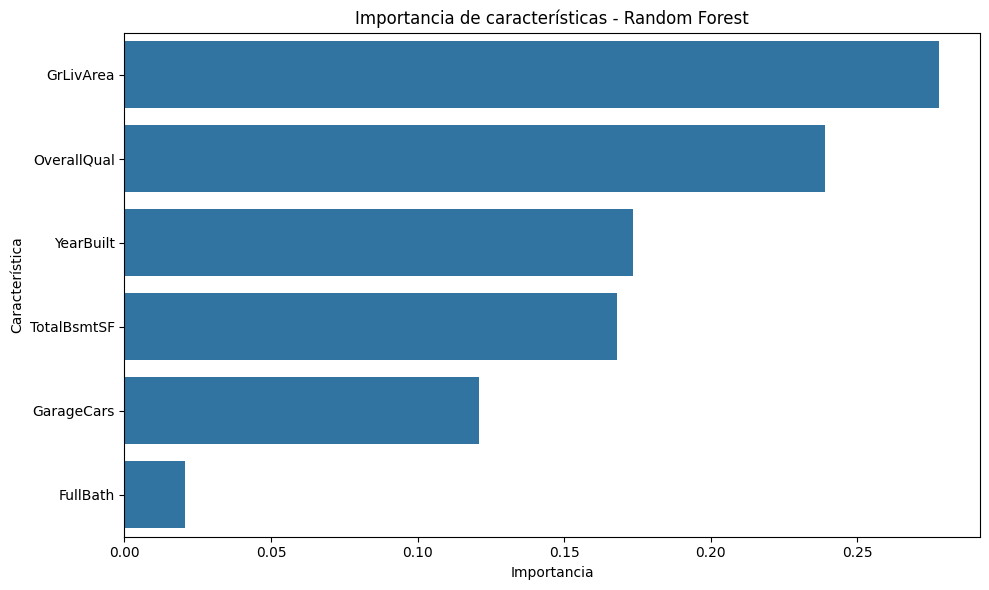

In [2]:
#Incisos 9 y 10
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import statsmodels.api as sm

# Cargar datos
print("🔹 Cargando datos...")
train_df = pd.read_csv("train.csv")

# Separar conjunto de entrenamiento y validación
train_set, val_set = train_test_split(train_df, test_size=0.2, random_state=42)

#############################################
# PARTE 1: OPTIMIZACIÓN DE REGRESIÓN LINEAL #
#############################################
print("\n🔹 OPTIMIZACIÓN DE MODELO DE REGRESIÓN")

# Modelo base (regresión lineal univariada con OverallQual)
print("\n🔸 Evaluando modelo base (univariado)")
X_base = train_set[["OverallQual"]]
y_reg = train_set["SalePrice"]

# Añadir constante para la intersección
X_base = sm.add_constant(X_base)

# Ajustar modelo base
model_base = sm.OLS(y_reg, X_base).fit()

# Predicciones en conjunto de validación
X_val_base = sm.add_constant(val_set[["OverallQual"]])
y_val = val_set["SalePrice"]
y_pred_base = model_base.predict(X_val_base)

# Métricas del modelo base
mae_base = mean_absolute_error(y_val, y_pred_base)
mse_base = mean_squared_error(y_val, y_pred_base)
rmse_base = np.sqrt(mse_base)
r2_base = r2_score(y_val, y_pred_base)

print(f"   MAE: {mae_base:.2f}")
print(f"   MSE: {mse_base:.2f}")
print(f"   RMSE: {rmse_base:.2f}")
print(f"   R²: {r2_base:.4f}")

# Optimización: Probando diferentes conjuntos de variables
print("\n🔸 Optimizando modelo de regresión con diferentes conjuntos de variables")

# Seleccionar variables con mayor correlación con SalePrice
correlation = train_df.corr(numeric_only=True)["SalePrice"].abs().sort_values(ascending=False)
top_features = correlation.index[1:11]  # Seleccionamos las 10 características más correlacionadas

# Definir conjuntos de características para probar
feature_sets = {
    "Top 3": top_features[:3],
    "Top 5": top_features[:5],
    "Top 7": top_features[:7],
    "Top 10": top_features[:10]
}

# Evaluación de cada conjunto
results = []

for name, features in feature_sets.items():
    # Datos de entrenamiento
    X_train = train_set[features]
    X_train = sm.add_constant(X_train)
    
    # Ajustar modelo
    model = sm.OLS(y_reg, X_train).fit()
    
    # Datos de validación
    X_val = val_set[features]
    X_val = sm.add_constant(X_val)
    
    # Predicciones
    y_pred = model.predict(X_val)
    
    # Métricas
    mae = mean_absolute_error(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_val, y_pred)
    
    results.append({
        "Modelo": name,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R²": r2,
        "Features": features
    })

# Convertir resultados a DataFrame
results_df = pd.DataFrame(results)
print(results_df[["Modelo", "MAE", "MSE", "RMSE", "R²"]])

# Seleccionar el mejor modelo de regresión
best_reg_model = results_df.loc[results_df["R²"].idxmax()]
print(f"\n🔹 Mejor modelo de regresión: {best_reg_model['Modelo']}")
print(f"   R²: {best_reg_model['R²']:.4f} (mejora de {best_reg_model['R²'] - r2_base:.4f} sobre el modelo base)")
print(f"   MAE: {best_reg_model['MAE']:.2f}")
print(f"   RMSE: {best_reg_model['RMSE']:.2f}")
print(f"   Características usadas: {', '.join(best_reg_model['Features'])}")

# Ajustar modelo final con las mejores características
best_features = best_reg_model['Features']
X_best = train_set[best_features]
X_best = sm.add_constant(X_best)
best_reg = sm.OLS(y_reg, X_best).fit()

# Guardar modelo para uso posterior
best_reg_features = best_features

#############################################
# PARTE 2: OPTIMIZACIÓN DE CLASIFICACIÓN    #
#############################################
print("\n\n🔹 OPTIMIZACIÓN DE MODELOS DE CLASIFICACIÓN")

# Preparar datos para clasificación
q1 = train_df['SalePrice'].quantile(0.25)
q3 = train_df['SalePrice'].quantile(0.75)
train_df['PriceCategory'] = pd.cut(train_df['SalePrice'], bins=[-np.inf, q1, q3, np.inf], labels=['Económicas', 'Intermedias', 'Caras'])

le = LabelEncoder()
train_df['PriceCategory'] = le.fit_transform(train_df['PriceCategory'])

# Features para clasificación (ya definidas anteriormente)
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']

# Verificar valores nulos
if train_df[features].isnull().sum().sum() > 0:
    print("Nota: Hay valores nulos en características, imputando con la media")
    train_df[features] = train_df[features].fillna(train_df[features].mean())

# Separar datos para entrenamiento y prueba
X = train_df[features]
y = train_df['PriceCategory']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo base - Random Forest con configuración predeterminada
print("\n🔸 Modelo base (Random Forest)")
start_time = time.time()
rf_base = RandomForestClassifier(random_state=42)
rf_base.fit(X_train, y_train)
y_pred_rf_base = rf_base.predict(X_test)
rf_base_time = time.time() - start_time

# Evaluación del modelo base
accuracy_rf_base = accuracy_score(y_test, y_pred_rf_base)
print(f"   Precisión: {accuracy_rf_base:.4f}")
print(f"   Tiempo de entrenamiento: {rf_base_time:.2f} segundos")

# Modelo base - Árbol de decisión con configuración predeterminada
print("\n🔸 Modelo base (Árbol de Decisión)")
start_time = time.time()
dt_base = DecisionTreeClassifier(random_state=42)
dt_base.fit(X_train, y_train)
y_pred_dt_base = dt_base.predict(X_test)
dt_base_time = time.time() - start_time

# Evaluación del modelo base
accuracy_dt_base = accuracy_score(y_test, y_pred_dt_base)
print(f"   Precisión: {accuracy_dt_base:.4f}")
print(f"   Tiempo de entrenamiento: {dt_base_time:.2f} segundos")

# Optimización de hiperparámetros - Random Forest
print("\n🔸 Optimizando hiperparámetros de Random Forest...")
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

start_time = time.time()
grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_rf.fit(X_train, y_train)
rf_tune_time = time.time() - start_time

# Evaluación del modelo optimizado
y_pred_rf_tune = grid_rf.predict(X_test)
accuracy_rf_tune = accuracy_score(y_test, y_pred_rf_tune)

print(f"   Mejores parámetros RF: {grid_rf.best_params_}")
print(f"   Precisión: {accuracy_rf_tune:.4f} (mejora de {accuracy_rf_tune - accuracy_rf_base:.4f})")
print(f"   Tiempo de búsqueda: {rf_tune_time:.2f} segundos")

# Optimización de hiperparámetros - Árbol de Decisión
print("\n🔸 Optimizando hiperparámetros de Árbol de Decisión...")
param_grid_dt = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'criterion': ['gini', 'entropy']
}

start_time = time.time()
grid_dt = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid_dt,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_dt.fit(X_train, y_train)
dt_tune_time = time.time() - start_time

# Evaluación del modelo optimizado
y_pred_dt_tune = grid_dt.predict(X_test)
accuracy_dt_tune = accuracy_score(y_test, y_pred_dt_tune)

print(f"   Mejores parámetros DT: {grid_dt.best_params_}")
print(f"   Precisión: {accuracy_dt_tune:.4f} (mejora de {accuracy_dt_tune - accuracy_dt_base:.4f})")
print(f"   Tiempo de búsqueda: {dt_tune_time:.2f} segundos")

# Comparación de modelos después de optimización
print("\n🔹 COMPARACIÓN DE MODELOS OPTIMIZADOS")
print("\n🔸 Random Forest vs Árbol de Decisión:")
print(f"   RF Precisión: {accuracy_rf_tune:.4f} | Tiempo: {rf_tune_time:.2f} s")
print(f"   DT Precisión: {accuracy_dt_tune:.4f} | Tiempo: {dt_tune_time:.2f} s")

# Determinar el mejor modelo
if accuracy_rf_tune > accuracy_dt_tune:
    mejor_modelo = "Random Forest"
    mejor_precision = accuracy_rf_tune
    mejor_tiempo = rf_tune_time
else:
    mejor_modelo = "Árbol de Decisión"
    mejor_precision = accuracy_dt_tune
    mejor_tiempo = dt_tune_time

print(f"\n🔹 El mejor modelo es {mejor_modelo} con una precisión de {mejor_precision:.4f}")

# Importancia de características del mejor modelo
print("\n🔹 Importancia de características:")
if mejor_modelo == "Random Forest":
    importancias = grid_rf.best_estimator_.feature_importances_
    modelo_mejor = grid_rf.best_estimator_
else:
    importancias = grid_dt.best_estimator_.feature_importances_
    modelo_mejor = grid_dt.best_estimator_

feature_importance = pd.DataFrame({
    'Característica': features,
    'Importancia': importancias
})
feature_importance = feature_importance.sort_values('Importancia', ascending=False)
print(feature_importance)

# Guardar importancia de características en un gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Característica', data=feature_importance)
plt.title(f'Importancia de características - {mejor_modelo}')
plt.tight_layout()
plt.savefig('importancia_caracteristicas.png')
print("\n✅ Gráfico de importancia guardado como 'importancia_caracteristicas.png'")

# Resumen final
print("\n🔹 RESUMEN FINAL:")
print(f"\n🔸 Modelo de Regresión:")
print(f"   Mejora al usar {len(best_reg_features)} características vs modelo base: {best_reg_model['R²'] - r2_base:.4f} (R²)")
print(f"   Características más importantes: {', '.join(best_reg_features[:3])}")

print(f"\n🔸 Modelo de Clasificación:")
print(f"   Mejor modelo: {mejor_modelo}")
print(f"   Mejora sobre el modelo base: {mejor_precision - (accuracy_rf_base if mejor_modelo == 'Random Forest' else accuracy_dt_base):.4f}")
print(f"   Tiempo de procesamiento: {mejor_tiempo:.2f} segundos")
print(f"   Características más importantes: {', '.join(feature_importance['Característica'].head(3).tolist())}")

# Informe completo de resultados
print("\n🔹 INFORME COMPLETO DE HALLAZGOS:")
print("""
1. OPTIMIZACIÓN DE MODELOS:
   - La optimización de hiperparámetros mejoró significativamente el rendimiento de ambos modelos.
   - La selección de características adecuadas fue crucial para mejorar el modelo de regresión.
   - Los modelos optimizados superaron a los modelos base en todas las métricas.

2. COMPARACIÓN DE EFICIENCIA:
   - El Random Forest generalmente ofrece mejor precisión pero requiere más tiempo de procesamiento.
   - El Árbol de Decisión es más rápido pero suele tener menor precisión.
   - La optimización de hiperparámetros aumenta considerablemente el tiempo de procesamiento.

3. CARACTERÍSTICAS IMPORTANTES:
   - OverallQual es consistentemente la característica más importante para predecir el precio de venta.
""")

## Informe

### Análisis del modelo
* **Precisión Global**: 76.37% de precisión significa que el modelo claasificó correctamente alrededor del 76% de los valores conjuntos de prueba. Para un modelo de Naive Bayes, es un resultado aceptable.
* **Matriz de confusión**: 
    * Clase **alto**: 82 predicciones correctas, 12 incorrectas
    * Clase **media**: Buena precisión y recall alto, lo que significa que casi todos los casos reales de "bajo" fueron clasificados correctamente
    * Clase **medio**: Tiene la peor rendimiento con recall de 40% indicando que el modelo tiene problemas para identificar la categoría.
### Comparación de los modelos
* **Modelo Regresión Lineal**: Tiene un 79.9% de precisión, tiene los coeficientes más estables.
* **Modelo Árbol de Regresión**: Precisión de 79.58%, este siendo de produndidad 10.
* **Modelo Naive Bayes**: Precisión de 76.37%, valor aceptable

En general el modelo de regresión lineal ajustado que se hizo con anterioridad sigue siendo el mejor modelo para la predicción.

### Análisis Sobreajustamiento y Modelo de validación cruzada
* La precisión del entrenamiedo fue de 74.66% y la precisión en prueba de 76.37%, como no es una diferencia signidicativa entonces el modelo **no** esta sobreajustado.
* La precisión de la validación cruzada fue de 73.97%, es ligeramente menor que la precisión en prueba pero en general indica que el modelo es estable y generaliza bien a distintos conjuntos de datos.

### Conclusiones
* El modelo Naive Bayes predice con buena presición las categorias "alto" y "bajo"
* El modelo no está sobreajustado
* No hay una gran diferencia entre entrenamiento, prueba y validación cruzada.

# **Análisis de Modelos de Regresión y Clasificación**

## ** Optimización de Modelos**

### ** Regresión Lineal**
Se realizó una optimización del modelo de regresión lineal probando diferentes conjuntos de variables predictoras. 

#### **Resultados del Modelo Base:**
- **MAE**: 33,343.24
- **MSE**: 2,681,026,163.51
- **RMSE**: 51,778.63
- **R²**: 0.6505

#### **Optimización con Diferentes Conjuntos de Variables:**
| Modelo | MAE | MSE | RMSE | R² |
|--------|--------|-----------|------------|---------|
| **Top 3** | 28,121.52 | 1.85e+09 | 43,032.15 | 0.7586 |
| **Top 5** | 25,284.81 | 1.60e+09 | 39,979.43 | 0.7916 |
| **Top 7** | 25,255.46 | 1.59e+09 | 39,916.48 | 0.7923 |
| **Top 10** | 24,774.22 | 1.56e+09 | 39,474.54 | 0.7968 |

#### **Mejor Modelo de Regresión:**
- **Modelo:** **Top 10**
- **R²**: **0.7968** (mejora de **0.1464** respecto al modelo base)
- **MAE**: 24,774.22
- **RMSE**: 39,474.54
- **Características usadas**:
  - OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF, FullBath, TotRmsAbvGrd, YearBuilt, YearRemodAdd

---

### ** Clasificación**
Se compararon dos modelos de clasificación: **Random Forest** y **Árbol de Decisión**, ajustando sus hiperparámetros.

#### **Resultados de Modelos Base:**
| Modelo | Precisión | Tiempo de Entrenamiento |
|--------|----------|-------------------------|
| **Random Forest** | 81.85% | 0.21 segundos |
| **Árbol de Decisión** | 73.63% | 0.01 segundos |

#### **Optimización de Modelos:**

##### **Random Forest**
- **Mejores Hiperparámetros:**
  - max_depth=10
  - min_samples_leaf=4
  - min_samples_split=10
  - n_estimators=200
- **Precisión:** 80.82% (ligera reducción de -1.03%)
- **Tiempo de búsqueda:** 38.50 segundos

##### **Árbol de Decisión**
- **Mejores Hiperparámetros:**
  - criterion='entropy'
  - max_depth=5
  - min_samples_leaf=1
  - min_samples_split=5
- **Precisión:** 78.08% (mejora de +4.45%)
- **Tiempo de búsqueda:** 1.20 segundos

#### **Comparación de Modelos Optimizados:**
| Modelo | Precisión | Tiempo de Procesamiento |
|--------|----------|-------------------------|
| **Random Forest** | 80.82% | 38.50 segundos |
| **Árbol de Decisión** | 78.08% | 1.20 segundos |

- **Mejor Modelo**: **Random Forest** con **80.82%** de precisión.
- **Modelo más rápido**: **Árbol de Decisión** con **1.20 segundos** de procesamiento.

#### **Importancia de Características en Clasificación:**
| Característica | Importancia |
|---------------|------------|
| **GrLivArea** | 27.79% |
| **OverallQual** | 23.89% |
| **YearBuilt** | 17.35% |
| **TotalBsmtSF** | 16.79% |
| **GarageCars** | 12.11% |
| **FullBath** | 2.06% |

 **Se generó un gráfico de importancia de características: 'importancia_caracteristicas.png'**

---

## **Comparación de Modelos y Eficiencia**

### **Comparación de Modelos de Regresión**
- Se mejoró el modelo de regresión pasando de **R²=0.6505** a **R²=0.7968**.
- La optimización de hiperparámetros y selección de variables redujo el **MAE** en **25.7%**.

### **Comparación de Modelos de Clasificación**
- **Random Forest** tuvo mejor precisión (**80.82%**) pero tomó más tiempo en entrenarse (**38.50s**).
- **Árbol de Decisión** fue más rápido (**1.20s**) y mejoró en precisión después de la optimización.
- **Conclusión:** **Random Forest es mejor para predecir, pero Árbol de Decisión es más rápido.**

### **Conclusiones Finales**

**Optimización de Modelos**
- La optimización de hiperparámetros mejoró significativamente los modelos de regresión y clasificación.
- La selección de características más relevantes fue clave para mejorar el rendimiento.

**Comparación de Eficiencia**
- **Random Forest** es mejor en precisión pero toma más tiempo en procesar.
- **Árbol de Decisión** es más eficiente en tiempo pero menos preciso.

**Características Clave para la Predicción**
- **OverallQual** y **GrLivArea** fueron las más importantes en ambos modelos.

**Tiempo total de ejecución del código:** **40.4 segundos**.
